In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('/content/election2024.csv')

In [14]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [15]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [17]:
df.isnull().sum()

,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [20]:
df.shape

(1600, 16)

In [21]:
df=df.drop(columns=['job_type','company_type'])

In [22]:
df.shape

(1600, 14)

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts())
    print("\n")


Unique values in id:
id
07169ed8148ce047    1
0716a8f7a98ceab4    1
0716968485ccea72    1
07167fa9264ceb65    1
07166778618ce822    1
                   ..
0716afc0a28cea87    1
07168fbd9d4ce53f    1
07167bd65a0ce094    1
07168f3957cce462    1
07168088318cef88    1
Name: count, Length: 1600, dtype: int64


Unique values in sex:
sex
female    843
male      757
Name: count, dtype: int64


Unique values in federal_district:
federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64


Unique values in type_of_city:
type_of_city
city with population of 100-500k                391
village                                         366
city with population of 1 million and higher    307
city with population of less than 50k           179
city with population of 500-950k                170
city with population of 50-100k           

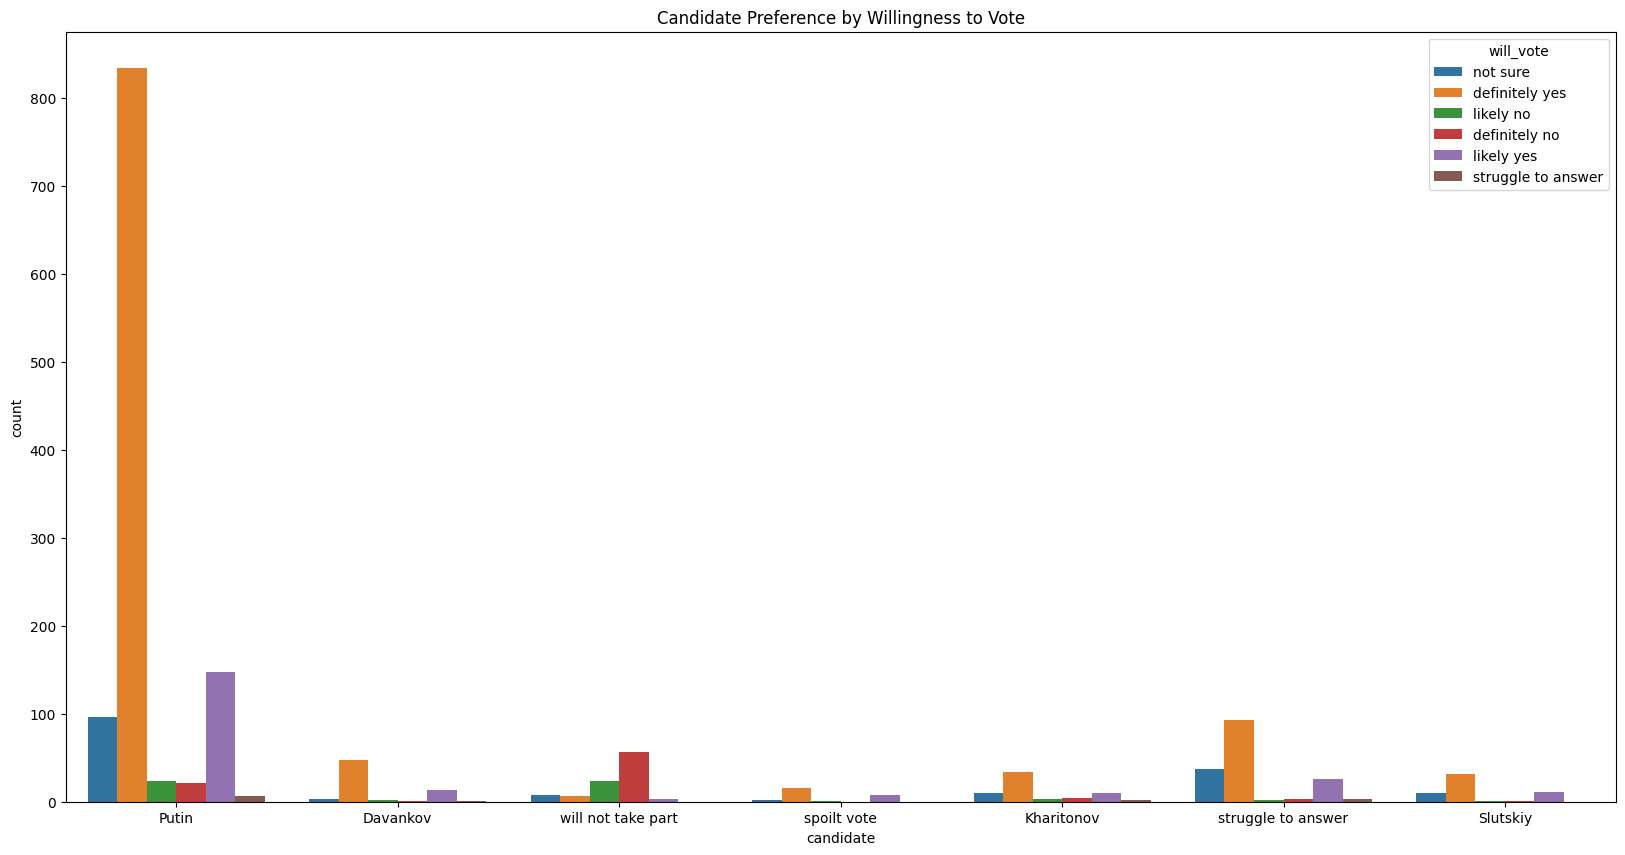

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='candidate', hue='will_vote', data=df)
plt.title("Candidate Preference by Willingness to Vote")
plt.show()


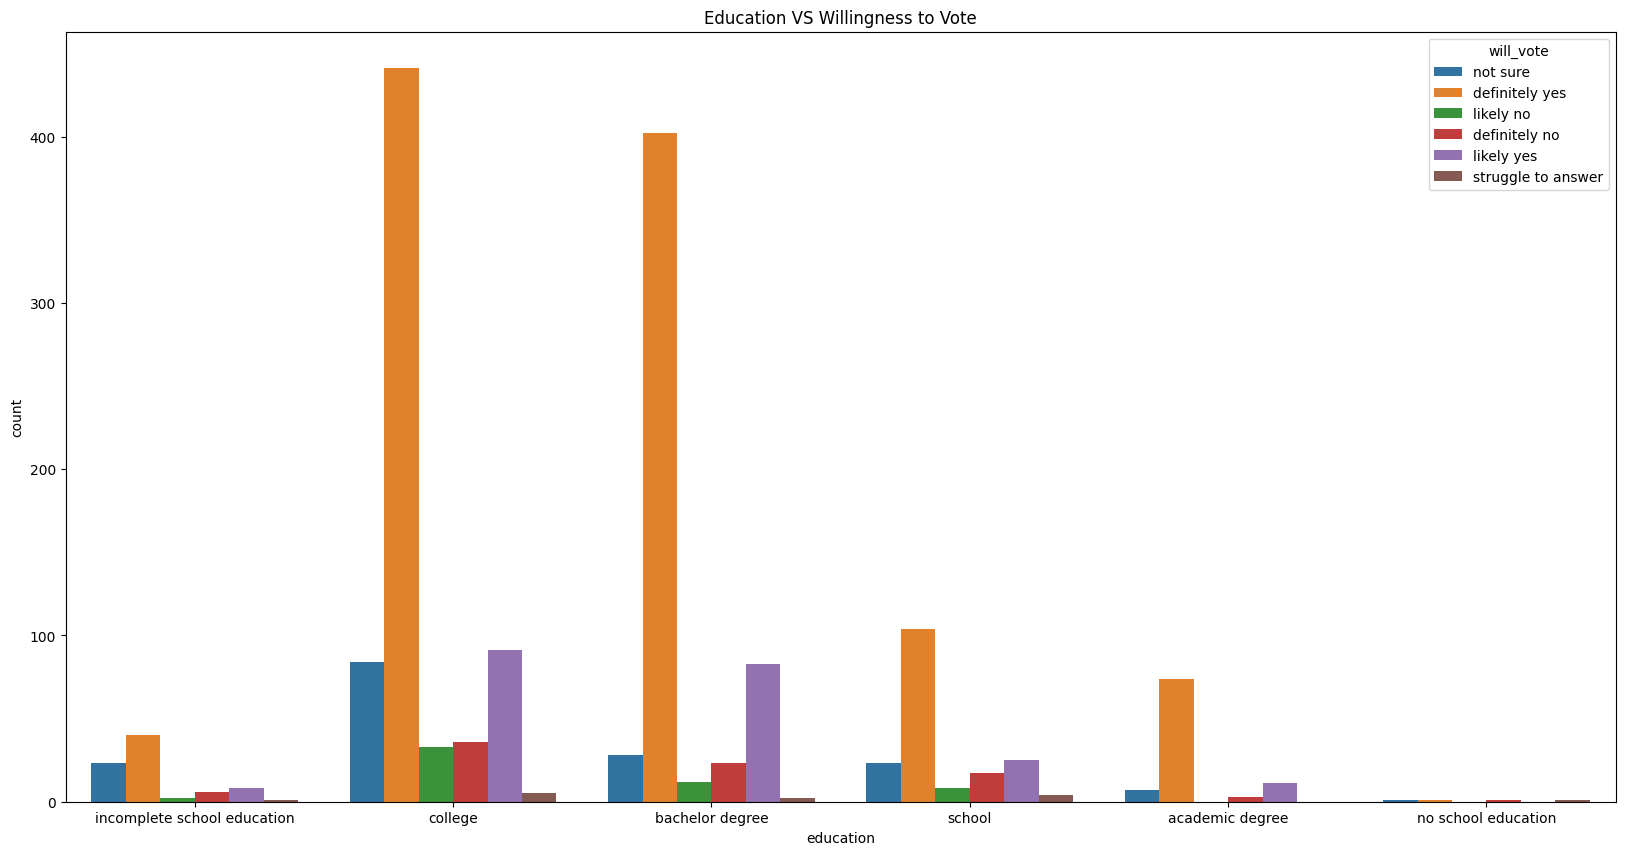

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='education', hue='will_vote', data=df)
plt.title("Education VS Willingness to Vote")
plt.show()


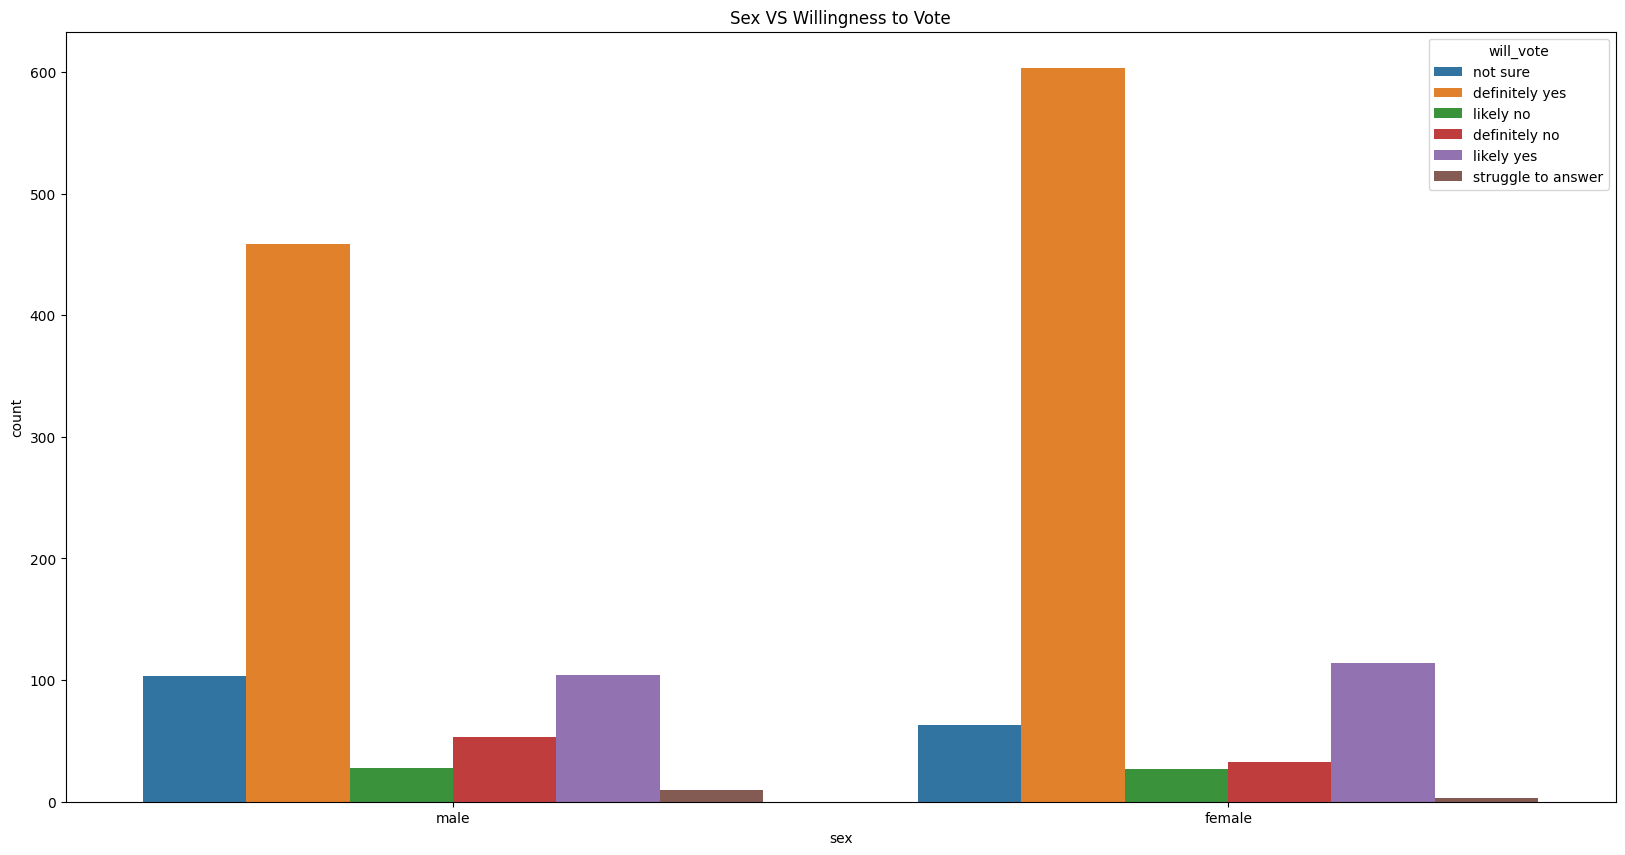

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='sex', hue='will_vote', data=df)
plt.title("Sex VS Willingness to Vote")
plt.show()


In [27]:
print(df[['age', 'weight1']].describe())

               age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


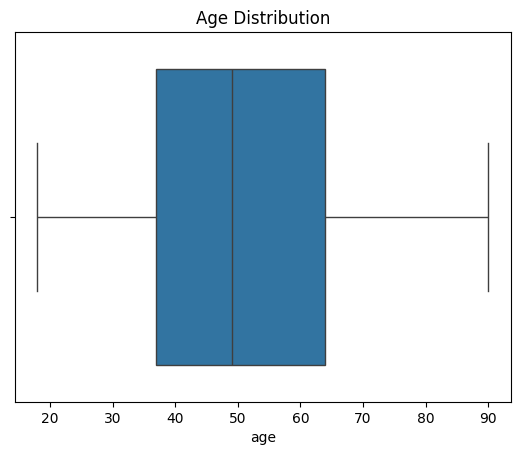

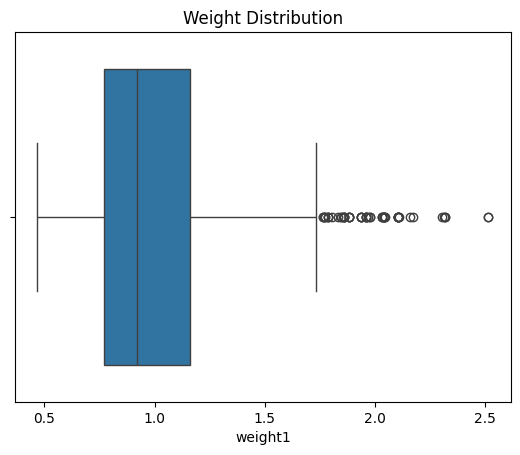

In [28]:
sns.boxplot(x='age', data=df)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='weight1', data=df)
plt.title("Weight Distribution")
plt.show()


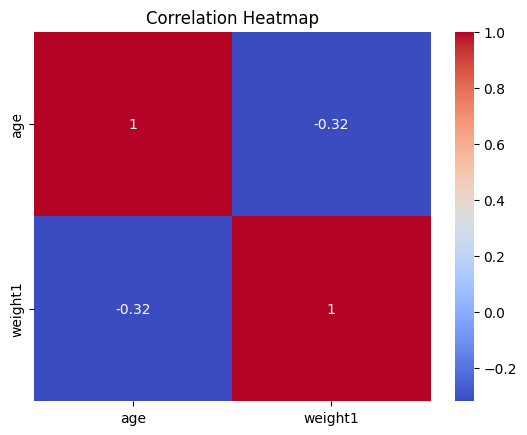

In [29]:
correlation = df[['age', 'weight1']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


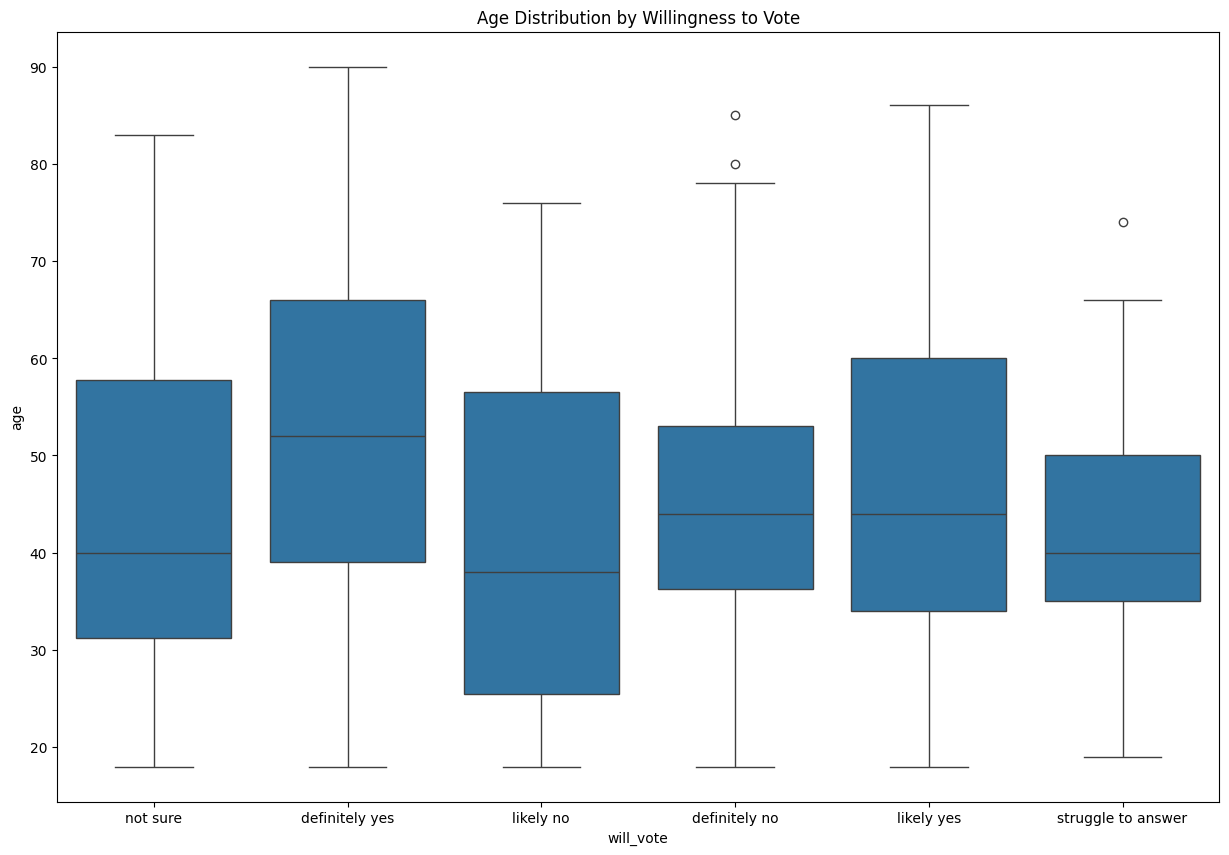

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(x='will_vote', y='age', data=df)
plt.title("Age Distribution by Willingness to Vote")
plt.show()


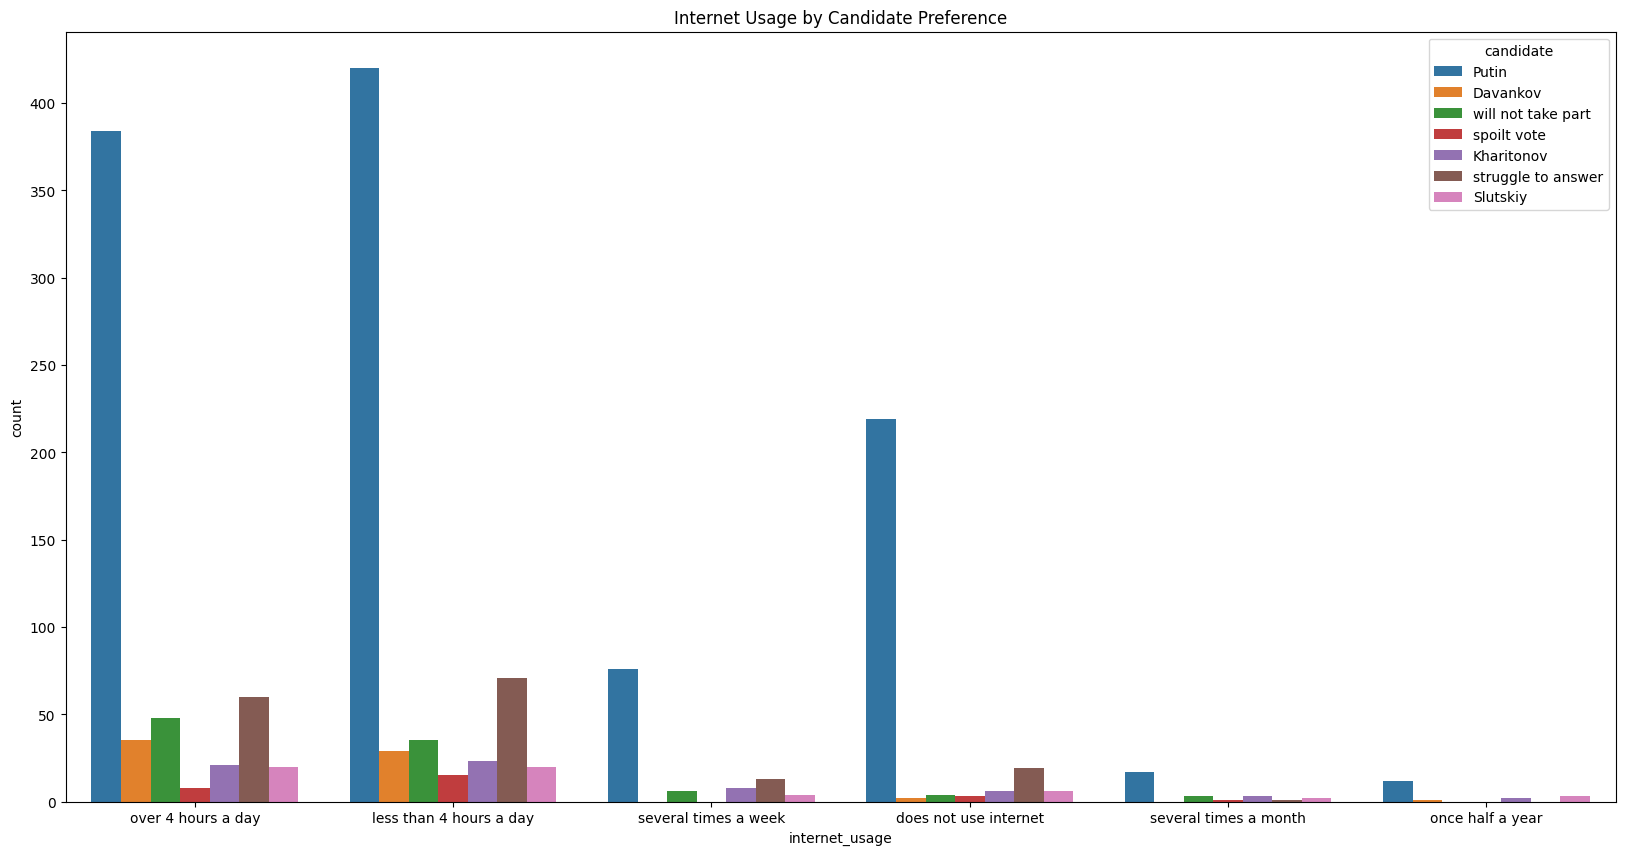

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='internet_usage', hue='candidate', data=df)
plt.title("Internet Usage by Candidate Preference")
plt.show()
